<a href="https://colab.research.google.com/github/rezyek06/mnist_dataset_project/blob/main/Mnist_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.datasets import mnist

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [30]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])

In [31]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8256 - loss: 1.2689 - val_accuracy: 0.9793 - val_loss: 0.0654
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9655 - loss: 0.1111 - val_accuracy: 0.9833 - val_loss: 0.0488
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9732 - loss: 0.0845 - val_accuracy: 0.9852 - val_loss: 0.0485
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9772 - loss: 0.0742 - val_accuracy: 0.9853 - val_loss: 0.0450
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9810 - loss: 0.0629 - val_accuracy: 0.9840 - val_loss: 0.0572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9820 - loss: 0.0593 - val_accuracy: 0.9858 - val_loss: 0.0454
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9832 - loss: 0.0549 - val_accuracy: 0.9862 - val_loss: 0.0424
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9852 -

In [32]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9836 - loss: 0.0606


[0.04407213628292084, 0.9873999953269958]

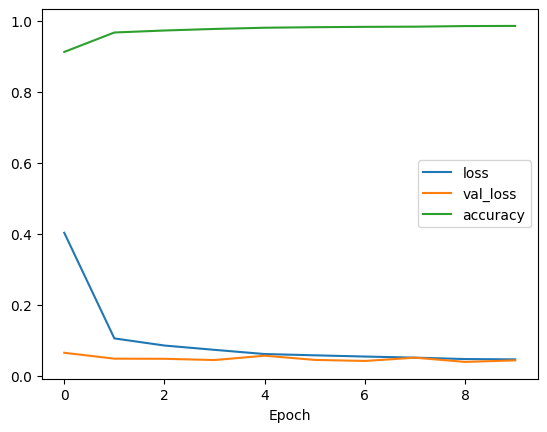

In [36]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()